## Aprendizaje Automatico

Ejercicio 1

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
sym.init_printing(use_unicode=True)

x = sym.Symbol('x')
y = sym.Symbol('y')
f  = lambda x,y: x**2 - y**2+2*x
Grad = lambda f,x0,y0,h = 1e-10: np.array([(f(x0+h,y0)-f(x0-h,y0))/((2*h)),(f(x0,y0+h)-f(x0,y0-h))/(2*h)])
x0,y0 = 1.,1.
h = 1e-10

def plane(x,y):
    Vecg = Grad(f,1,1)
    Vec = np.array([x-1,y-1])
    point = Vec[0]*Vecg[0] + Vec[1]*Vecg[1]
    return f(1,1) + point


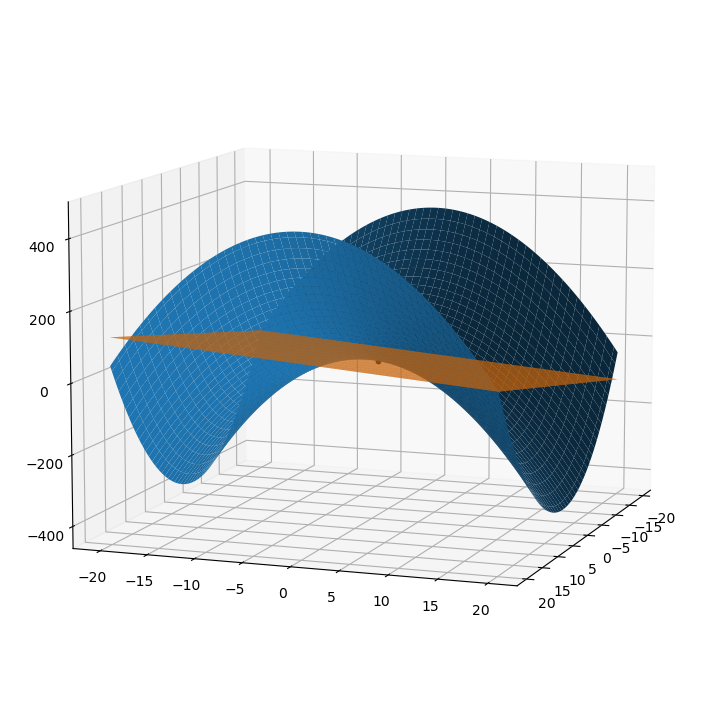

In [3]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 10, azim = 20)
x = np.linspace(-20,20,100)
y = np.linspace(-20,20,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
Z2 = plane(X,Y)
ax.plot_surface(X,Y,Z)
ax.plot_surface(X,Y,Z2)
ax.scatter(1, 1, 2, c='black', s=10)

Ejercicio 2

In [4]:
def f(x,y):
    return x**4 + y**4 - 2*(x-y)**2

def gradient(f,x,y,h=1e-6):
    Dx=(f(x+h,y)-f(x-h,y))/(2*h)
    Dy=(f(x,y+h)-f(x,y-h))/(2*h)
    return np.array([Dx,Dy])

def gradient_descent_momentum(f,t,lr=0.001,coeff_m=0.6,itmax=int(1e4), error=1e-7):
    metric=1
    it=1
    r=np.array([t])
    r = np.vstack((r,t))
    while metric>error and it<itmax:
        grad=gradient(f,r[it-1,0],r[it-1,1])     
        if it==1 or it==2:
            r[it]=r[it-1]-lr*grad
        if it>2:
            r[it]=(r[it-1]-lr*grad)+(coeff_m*(r[it-2]-r[it-3]))
    
        r = np.vstack((r,r[it]))
        metric=np.max(np.abs(r[it]-r[it-1]))


        it+=1
    return it,r[-1]

def Minimizer_gradient(f,r,lr=0.001,epochs=int(1e4),error=1e-4):
    metrica=1
    it=0
    while metrica > error and it < epochs:
        u=r.copy()
        grad=gradient(f,u[0],u[1])
        
        r = u-lr*grad
        metrica=np.max(np.abs(r-u))
     
        it+=1


        
    return it,r  


In [5]:
gradient_descent_momentum(f,np.array([0.,3.]))

(316, array([-1.41421159,  1.41421159]))

In [6]:
Minimizer_gradient(f,np.array([0.,3.]))

(391, array([-1.40840139,  1.40953088]))

In [7]:
gradient_descent_momentum(f,np.array([0.,3.]), coeff_m=0.69499)

(175, array([-1.41421766,  1.41421804]))

 No existe un coeficiente del momentum que reduzca el número de iteraciones obtenidas anteriormente con un  coeficiente=$0.6$ $(316)$ exactamente a la mitad $(158)$. Sin embargo el coeficiente=$0.69499$ es el valor más acercado a un número mínimo de iteraciones.

Ejercicio 3

In [8]:
def g(x):
    if x > 2: 
        return x-2
    else:
        return -x+2

Dx = lambda f,x,h=-1e-5: (f(x+h) - f(x-h))/(2*h)

def Minimizer(f, N=300, gamma=0.01):
    
    r = np.zeros(N)
    # Seed
    r[0] = np.random.uniform(-5,5)
    
    for i in (range(1,N)):
        r[i] = r[i-1] - gamma*Dx(f,r[i-1])
        
    return r
N = 200
x = Minimizer(g,N)
cost = np.zeros(N)
for i in range(N):
    cost[i] = g(x[i])
cost[-1]


Para esta funcion no deberia ser posible realizar el metodo del descenso al gradiente, ya que esta funcion no es continuamente diferenciable, debido a que no es una funcion "suave" en 0, por lo que su derivada alli no esta definida. El metodo que se usa es numerico, por tanto es una aproximacion, sin embargo en la formalidad matematica esto no se podria hacer.

## Algebra Lineal

Ejercicio 4

In [9]:
def multiplicacion_matrices(A,B):
    m=A.shape[0]
    p=B.shape[1]
    G=np.zeros((m,p))
    for i in range(m):
        for j in range(p):
            for k in range(A.shape[1]):
                G[i,j]+=A[i,k]*B[k,j]
    return G
A=np.array([[1,0,0],[5,1,0],[-2,3,1]])
B=np.array([[4,-2,1],[0,3,7],[0,0,2]])
multiplicacion_matrices(A,B)

array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 21.]])

In [10]:
np.dot(A,B) #Confirmar

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 21]])

Ejercicio 7

In [11]:
def GetOver_relaxation(A,b,x0,w,itmax=1000, tolerancia=1e-9):
    x=np.copy(x0)
    u=np.copy(x)
    residuo = np.linalg.norm( np.dot(A,x) - b)
    it=0
    while it<itmax and residuo>=tolerancia:
        u[:]=0
        for i in range(A.shape[0]):
            suma_1=np.sum(A[i,:i]*u[:i])
            suma_2=np.sum(A[i,i+1:]*x[i+1:])
            u[i]=(1-w)*x[i]+(w/A[i,i])*(b[i]-suma_1-suma_2)
        x=np.copy(u)
        residuo = np.max(np.abs(np.dot(A,x) - b))
        it+=1

    return x,it
                
A=np.array([[3,-1,-1],[-1,3,1],[2,1,4]])
b=np.array([1,3,7])
omega=np.linspace(0.1,1.3,300)
minimo=1000
for i in omega:
    r, it=GetOver_relaxation(A,b,np.array([0.,0.,0.]),i)
                             
    if it<minimo:
        minimo=it
        relajacion=i
        result=r
                             
r,minimo, relajacion

(array([1., 1., 1.]), 15, 0.9789297658862876)

Minímo número de iteraciones obtenidas=$15$
    
Paramétro de relajación para obtener un mínimo número de iteraciones= $0.9829431438127089$

Ejercicio 12

In [12]:
def GetF(G,r):
    v=np.zeros_like(r)
    for i in range(r.shape[0]):
        v[i]=G[i](*tuple(r))
    return v
#------------------------------------
def GetMetric(F,r):
    return 0.5*np.linalg.norm(GetF(F,r))**2
#----------------------------------------
def GetJacobian(f,r,h=1e-6):
    n=r.shape[0]
    J=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dr=r.copy()
            ir=dr.copy()
            dr[j]=dr[j]+h
            ir[j]=ir[j]-h
            dr=tuple(dr)
            ir=tuple(ir)
            J[i,j]=(f[i](*dr)-f[i](*ir))/(2*h)
    return J
#-----------------------------------------
def Minimizer_gradient(G,r,lr=1e-4,epochs=int(1e4),error=1e-7):
    metrica=1
    it=0 
    while metrica > error and it < epochs:
       
        J=GetJacobian(G,r)
        Vector=GetF(G,r)
        
        r -= lr*np.dot(J,Vector)
        metrica=GetMetric(G,r)
     
        it+=1    
    return r
#-----------------------------------------
def method_Newton_Raphson(G,r,itmax=1000, error=1e-9):
    d=1
    it=0
    while d>error and it< itmax:
        u=r.copy()
        invJ=np.linalg.inv(GetJacobian(G,u))
        F=GetF(G,u)
        r=u-np.dot(invJ, F)
        d=np.max(np.abs(r-u))
        it+=1

    return r
#-----------------------------------------
G=np.array([lambda x,y:np.log(x**2+y**2)-np.sin(x*y)-np.log(2)-np.log(np.pi), lambda x,y: np.e**(x-y)+np.cos(x*y)])
G2=np.array([lambda x,y,z: (6*x)-2*np.cos(y*z)-1, lambda x,y,z:(9*y)+np.sqrt(x**2+np.sin(z)+1.06)+0.9, lambda x,y,z: 60*z+3*np.e**(-x*y)+10*np.pi-3])

In [13]:
Minimizer_gradient(G,np.array([2.,2.]))

array([1.76810606, 1.77984275])

In [14]:
method_Newton_Raphson(G,np.array([2.,2.]))

array([1.77245385, 1.77245385])

In [15]:
method_Newton_Raphson(G2,np.array([0.,0.,0.]))

array([ 0.49814468, -0.1996059 , -0.52882598])

In [16]:
Minimizer_gradient(G2,np.array([0.,0.,0.]))

array([ 0.49807189, -0.19959253, -0.52882468])

Ejercicio 15

In [21]:
def Levi_Civita(i,j):
    if (i ==1 and j == 2) or (i ==2 and j == 3) or (i ==3 and j == 1): 
        return 1
    elif (i ==3 and j == 2) or (i ==1 and j == 3) or (i ==2 and j == 1):
        return -1
    else:
        return 0



sigma = np.array([[[0,1],[1,0]],
                  [[0,-1j],[1j,0]],
                  [[1,0],[0,-1]]])
for i in range(1,4):
    for j in range(1,4):
        A_B = np.dot(sigma[i-1],sigma[j-1]) - np.dot(sigma[j-1],sigma[i-1])
        Le = Levi_Civita(i,j)
        k = (i+j) % 4
        if k == 0: 
            k = 2
        a = 2*1j*Le*sigma[k-1]
        print(a == A_B)

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


Ejercicio 16

In [17]:
gam = np.array([[[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]],
                [[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]],
                [[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]],
                [[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]]])

nuv = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]])
I4 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
for i in range (4):
    j = i + 1
    while j<4:
        a = np.dot(gam[i],gam[j]) + np.dot(gam[j],gam[i])
        print(a == 2*np.dot(nuv,I4))
        j+=1

[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]


Ejercicio 17

In [18]:
x=sym.Symbol('x',real=True)
y=sym.Symbol('y',real=True)
z=x+sym.I*y
f=z**3-1
F=[sym.re(f),sym.im(f)]
J=sym.Matrix(F).jacobian([x, y])
Fn=sym.lambdify([x,y],F, 'numpy')
Jn=sym.lambdify([x,y],J, 'numpy')

def Newton_method(z0,Fn,Jn,error=1e-7,itmax=1000):
    parada=1
    it=0
    while parada > error and it < itmax:
        u0=z0.copy()

        invJ=np.linalg.inv(Jn(u0[0],u0[1]))
        
        F=Fn(u0[0],u0[1])
        
        z0=u0-np.dot(invJ,F)


        parada=np.max(np.abs(z0-u0))
        
        it+=1
    return z0


In [19]:
Newton_method(np.array([0.5,0.5]),Fn,Jn)

array([-0.5      ,  0.8660254])

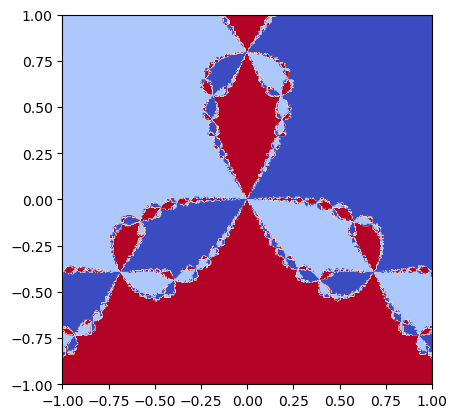

In [20]:
N=300
x=np.linspace(-1,1,N)
y=np.linspace(-1,1,N)
def fractal(x,y,N):
    z0=np.array([-0.5,np.sqrt(3)/2])
    z1=np.array([-0.5,-np.sqrt(3)/2])
    z2=np.array([1,0])
    fractal=np.zeros((N,N),np.int64)
    for i in range(N):
        for j in range(N):
            root=Newton_method(np.array([x[i],y[j]]),Fn,Jn)
            d1=np.linalg.norm(z0-root)
            d2=np.linalg.norm(z1-root)
            d3=np.linalg.norm(z2-root)
            menor=min(d1,d2,d3)
            if menor==d1:
                fractal[i,j]=20
            if menor==d2:
                fractal[i,j]=100
            if menor==d3:
                fractal[i,j]=255

    return fractal
Fractal=fractal(x,y,N)
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])